In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt

In [11]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [34]:
data = pd.merge(pd.merge(ratings, users), movies)

In [27]:
# An aggregate of the movie ratings for each particular genre. 
data.groupby('genres')['rating'].mean()

genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Action|Adventure|Children's                      1.318182
Action|Adventure|Children's|Comedy               2.306950
Action|Adventure|Children's|Fantasy              2.090909
Action|Adventure|Children's|Sci-Fi               1.874286
Action|Adventure|Comedy                          3.095330
Action|Adventure|Comedy|Crime                    3.137194
Action|Adventure|Comedy|Horror                   3.826642
Action|Adventure|Comedy|Horror|Sci-Fi            3.804233
Action|Adventure|Comedy|Romance                  3.862448
Action|Adventure|Comedy|Sci-Fi                   3.739953
Action|Adventure|Comedy|War                      2.276995
Action|Adventure|Crime                           2.925349
Action|

In [34]:
# The top 5 highest ranked genre by women.
mean_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')

In [35]:
woman_rating = mean_ratings.sort_values('F', ascending=0)

In [93]:
top_5_w = woman_rating[:5]
top_5_w[top_5_w.columns[0]]

genres
Animation|Comedy|Thriller             4.550802
Animation                             4.533333
Film-Noir|Romance|Thriller            4.448718
Sci-Fi|War                            4.376623
Adventure|Children's|Drama|Musical    4.355030
Name: F, dtype: float64

In [37]:
# The top 5 highest ranked genre by men. 
man_rating = mean_ratings.sort_values('M', ascending=0)

In [94]:
top_5_m = man_rating[:5]
top_5_m[top_5_m.columns[0]]

genres
Sci-Fi|War                   4.376623
Animation|Comedy|Thriller    4.550802
Film-Noir|Mystery            4.319444
Adventure|War                4.187970
Animation                    4.533333
Name: F, dtype: float64

In [45]:
# A breakdown of a movie’s ratings by age, use X-Men (2000).
xmen = data[data['title'] == 'X-Men (2000)']

In [47]:
age_ratings = xmen.pivot_table('rating', index='age')

In [48]:
age_ratings

age
1     3.805195
18    3.938875
25    3.851330
35    3.757322
45    3.633803
50    3.360000
56    3.230769
Name: rating, dtype: float64

In [91]:
# A function that given a user_id and movie_id , returns a list of user_ids 
# for other users that rated the movie identified by the provided movie_id with the same score. 

def sameRatingUsers(user_id, movie_id):
    sub_data = data.loc[(data['user_id'] == user_id) & (data['movie_id'] == movie_id)]
    rating = sub_data.ix[0,'rating']
    users = data[(data['movie_id'] == movie_id) & (data['rating'] == rating)]
    return users[users.columns[0]]

In [92]:
# example
sameRatingUsers(1, 1193)

0          1
1          2
4         17
6         19
7         24
9         33
10        39
16        53
17        54
18        58
22        81
23        88
24        89
25        95
28       102
30       107
32       120
33       123
34       131
38       150
40       155
41       166
42       169
43       175
45       180
46       190
49       195
53       208
60       235
61       236
        ... 
1668    5859
1669    5865
1670    5868
1674    5888
1676    5890
1682    5911
1684    5917
1685    5920
1687    5924
1690    5942
1693    5948
1694    5949
1695    5950
1697    5954
1698    5956
1699    5958
1700    5962
1701    5964
1702    5965
1706    5975
1708    5977
1709    5978
1712    5986
1714    6001
1715    6002
1718    6021
1719    6032
1720    6033
1721    6035
1722    6036
Name: user_id, dtype: int64

In [95]:
# Some other statistic, figure, data aggregate, or plot that you created using this dataset, 
# along with a short description of what interesting observations you derived from it. 

# I list the top five most rated genres by women and men and compare them with the top rated table and 
# can find that no genres appear on the both lists, which may indicate that the more users rate one genre,
# the less the genre tend to be rated. However drama, comedy and romance are among the most rated genres 
# for both men and women which show the popularity of those genres
count_ratings = data.pivot_table('rating', index='genres', columns='gender', aggfunc='count')
woman_rating = count_ratings.sort_values('F', ascending=0)
woman_rating[:5]

gender                F        M
genres                          
Drama           32852.0  78571.0
Comedy          29208.0  87675.0
Comedy|Romance  15600.0  27112.0
Comedy|Drama    12308.0  29937.0
Drama|Romance   11749.0  17421.0

In [96]:
man_rating = count_ratings.sort_values('M', ascending=0)
man_rating[:5]

gender                 F        M
genres                           
Comedy           29208.0  87675.0
Drama            32852.0  78571.0
Comedy|Drama     12308.0  29937.0
Comedy|Romance   15600.0  27112.0
Action|Thriller   4830.0  21929.0

In [35]:
data['timestamp'] = data['timestamp'].apply(lambda x: dt.datetime.fromtimestamp(x))

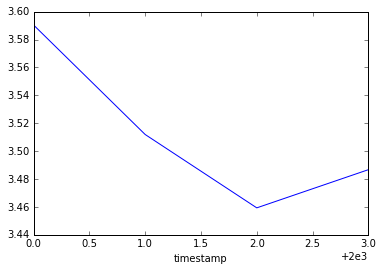

In [32]:
# I group the rating by years and find out the average rating is droping through the year
year_rating = data.groupby(data['timestamp'].map(lambda t: t.year))['rating'].mean()
day.plot()